In [5]:
import pandas as pd

titanic = pd.read_csv('data/day3Data/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [6]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

* 'PassengerId' : 승객번호, 'Survived': 생존여부(0-사망, 1-생존)
* 'Pclass' : 객실 등급(1,2,3), 'Name': 이름, 'Sex': 성별, 'Age' :나이, 'SibSp' : 함께 탑승한 형제와 배우자 수,
* 'Parch': 함께 탑승한 부모, 아이 수, 'Ticket':티켓번호, 'Fare':요금, 'Cabin':객실번호, 'Embarked': 탑승항구('S','C','Q')

#결측치
* 결측치 데이터 : 삭제, 다른값 대체

In [9]:
#결측치 확인하기
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# 결측 데이터가 너무 많으면 분석에 의미가 없기에 삭제함
# 결측데이터 삭제(Cabin)

titanic.drop('Cabin',axis=1,inplace=True)

In [11]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [12]:
# 결측 데이터를 최빈값으로 대체하기

titanic['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [15]:
# 데이터 채우는 명령어 : 변수명['열이름'].fillna('추가할데이터값')
titanic['Embarked'].fillna('S',inplace=True)

In [16]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [19]:
# 결측데이터를 평균값으로 대체 (나이)
titanic['Age'].mean()

np.float64(29.69911764705882)

In [21]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

C:\Users\B8-11\AppData\Local\Temp\ipykernel_16816\2855616432.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)


In [22]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# 데이터 Grouping
* 항구별 객실등급 개수 출력
* 객실 등급별, 성별, 나이, 요금의 평균 구하기

In [29]:
# 항구별 객실 등급 개수 출력
dataEmbarked = titanic.groupby('Embarked',as_index=False)[['Pclass']].count()
dataEmbarked

,Embarked,Pclass
0,C,168
1,Q,77
2,S,646


<Axes: xlabel='Embarked'>

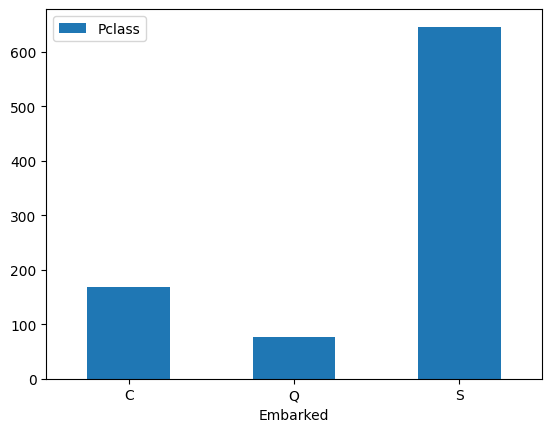

In [35]:
# pandas를 이용한 시각화
# df.plot(x,y)
dataEmbarked.plot(kind='bar', x='Embarked',rot = 0)

In [28]:
# 객실 등급별, 성별, 나이, 요금의 평균 계산
titanic.groupby(['Embarked','Sex'],as_index=False)[['Fare','Age']].mean().sort_values('Fare', ascending=False)

,Embarked,Sex,Fare,Age
0,C,female,75.169805,28.566978
1,C,male,48.262109,32.095759
4,S,female,39.143456,28.148220
5,S,male,21.711996,30.193391
3,Q,male,13.838922,30.182389
2,Q,female,12.634958,27.896634


In [52]:
dataSex = titanic.groupby(['Sex'],as_index=False)[['Fare','Age']].mean().sort_values('Fare', ascending=False)
dataSex

,Sex,Fare,Age
0,female,44.479818,28.216730
1,male,25.523893,30.505824


<Axes: xlabel='Sex'>

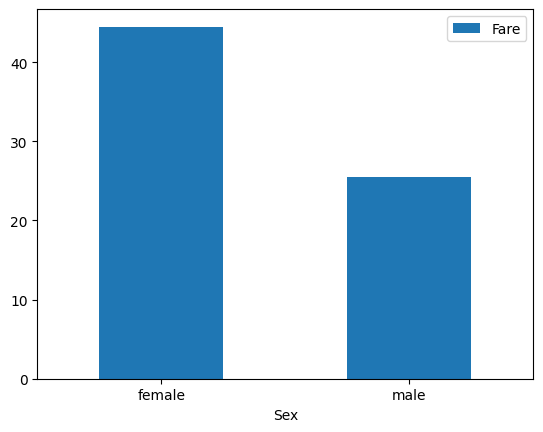

In [53]:
dataSex.plot(kind='bar', x='Sex', rot = 0, y='Fare')

# 차트의 구성
* 차트 제목 : title
* x축 제목 : xlabel, x축 눈금 : xlim, xticks <-> ylabel....
* 범례 : label, 마커 : marker, 눈금자 : grid, 선 : line

# 객실 등급 별 생존 여부 현황 그래프 작성

In [54]:
# 1단계 : 시각화 라이브러리 불러오기
import matplotlib.pyplot as plt

In [63]:
# 2단계 : 표시할 데이터 셋 정하기
# 0, 1
data0 = titanic.query('Survived == 0').groupby('Pclass')['Name'].count()
print(data0)
data1 = titanic.query('Survived == 1').groupby('Pclass')['Name'].count()
print(data1)

data = pd.merge(data0, data1, on='Pclass')
data.columns=['Death','Live']
data


Pclass
1     80
2     97
3    372
Name: Name, dtype: int64
Pclass
1    136
2     87
3    119
Name: Name, dtype: int64


,Death,Live
Pclass,,
1,80,136
2,97,87
3,372,119


In [67]:
# 한글 코드 불러오기
# import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'

<function matplotlib.pyplot.show(close=None, block=None)>

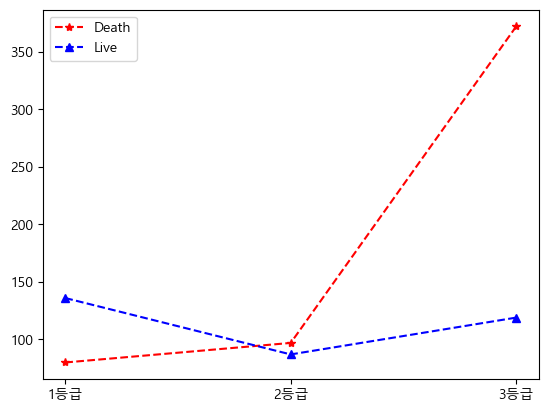

In [69]:
# 3단계 : plot()에 데이터 입력
plt.plot(data.index, data['Death'],marker='*', linestyle='--', color='red', label='Death')
plt.plot(data.index, data['Live'],marker='^', linestyle='--', color='blue', label='Live')
plt.legend()
plt.xticks(data.index,['1등급','2등급','3등급'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

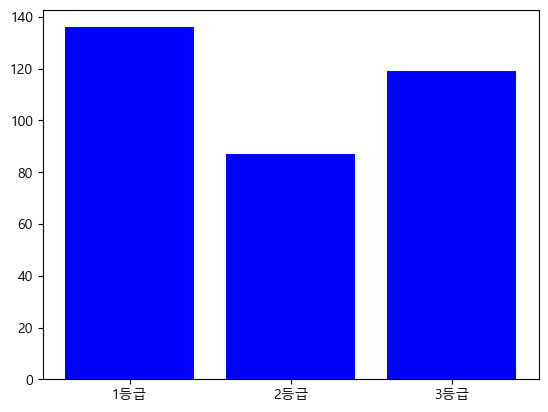

In [72]:
# 막대그래프, 생존자만
plt.bar(data.index, data['Live'], color='blue', label='Live')
plt.xticks(data.index,['1등급','2등급','3등급'])
plt.show


In [ ]:
%pip install matplotlib